# Explore here

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

#Modelar
from sklearn.model_selection import train_test_split

#escalar
from sklearn.preprocessing import StandardScaler

#endcoding
from sklearn.preprocessing import OneHotEncoder

datos = pd.read_csv("/workspaces/linear-regression/data/raw/datos", index_col=False)
datos

,Unnamed: 0,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df= pd.DataFrame(datos)
df.reset_index(drop=True, inplace=True)
print(df)

      Unnamed: 0  age     sex     bmi  children smoker     region      charges
0              0   19  female  27.900         0    yes  southwest  16884.92400
1              1   18    male  33.770         1     no  southeast   1725.55230
2              2   28    male  33.000         3     no  southeast   4449.46200
3              3   33    male  22.705         0     no  northwest  21984.47061
4              4   32    male  28.880         0     no  northwest   3866.85520
...          ...  ...     ...     ...       ...    ...        ...          ...
1333        1333   50    male  30.970         3     no  northwest  10600.54830
1334        1334   18  female  31.920         0     no  northeast   2205.98080
1335        1335   18  female  36.850         0     no  southeast   1629.83350
1336        1336   21  female  25.800         0     no  southwest   2007.94500
1337        1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 8 columns]


In [4]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns= ['Unnamed: 0'])
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


| VARIABLE  | DESCRIPCIÓN             | CATEGORIA |
|-----------|-------------------------|-----------|
| AGE       | Edad (años)             | Númerica  |
| SEX       | Sexo (Hombre/ Mujer)    |Categorica |
| BMI       | Índice de masa corporal | Númerica  |
| CHILDREN  | Si tiene niñxs o no     |Categorica |
| SMOKER    | Si fuma o no            |Categorica |
| REGION    | Región donde vive       |Categorica |
| CHARGES   | Costos médicos          | Númerica  |


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.duplicated().sum()


np.int64(1)

In [8]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]
numeric_columns = ["age", "bmi", "children", "smoker_n", "charges"]

In [10]:
columnas_eliminar = ['sex', 'sex_n', 'region', 'region_n', 'smoker']
df = df.drop(columns= columnas_eliminar)

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
column_names = df.columns
scal_features = scaler.fit_transform(df)
df_scal = pd.DataFrame(scal_features, columns=column_names, index = df.index)
df_scal.head()

,age,bmi,children,charges,smoker_n
0,0.021739,0.321227,0.0,0.251611,0.0
1,0.000000,0.479150,0.2,0.009636,1.0
2,0.217391,0.458434,0.6,0.053115,1.0
3,0.326087,0.181464,0.0,0.333010,1.0
4,0.304348,0.347592,0.0,0.043816,1.0


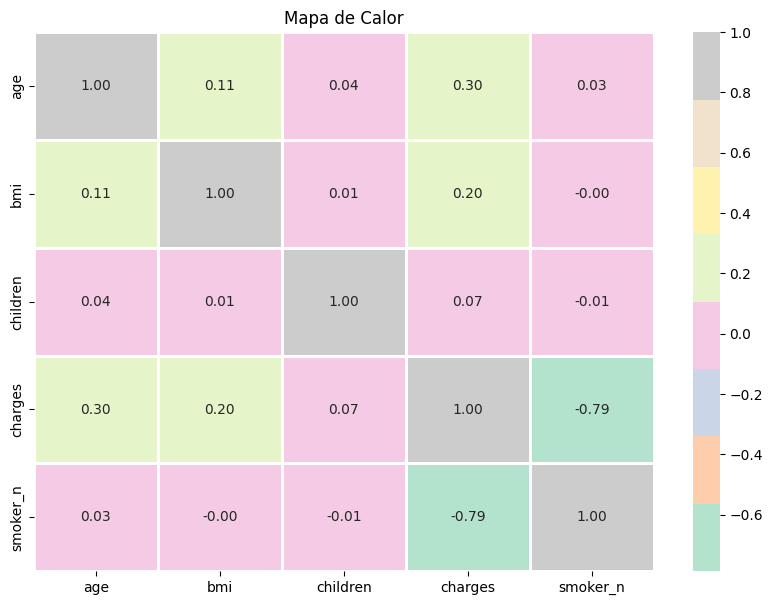

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 7)), 
 
sns.heatmap(df_scal.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
 
plt.title('Mapa de Calor')
plt.show()

En este mapa de calor podemos observar que la edad es la que mayor relación tiene con el precio, ya que mientras las personas van envejenciendo tienen más dolores, más "problemas" loque hace que el precio vaya en aumento.

<Axes: >

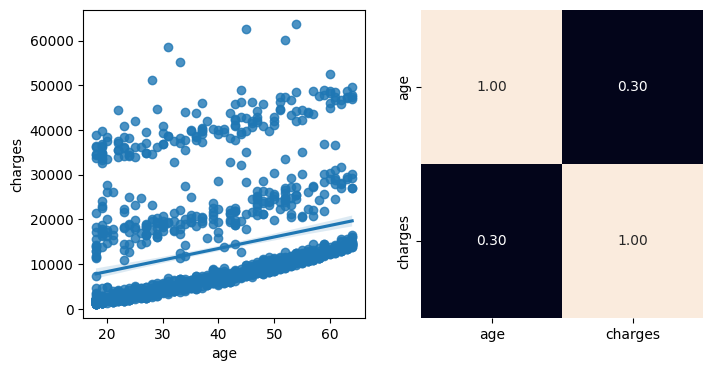

In [15]:
fig, axis = plt.subplots(1, 2, figsize = (8, 4))

sns.regplot(data = df, x = "age", y = "charges", ax = axis[0])
sns.heatmap(df[["age", "charges"]].corr(), annot = True, fmt = ".2f", cbar = False)

A mayor edad más es el precio de los seguros

In [16]:
from sklearn.model_selection import train_test_split

X = df_scal.drop("charges", axis=1)
y = df_scal ["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,age,bmi,children,smoker_n
560,0.608696,0.107345,0.4,1.0
1285,0.630435,0.224913,0.0,1.0
1142,0.739130,0.239440,0.0,1.0
969,0.456522,0.493947,1.0,1.0
486,0.782609,0.148238,0.6,1.0


In [17]:
from sklearn.feature_selection import SelectKBest, f_classif

# Con un valor de k = x queremos decir implícitamente que queremos eliminar 2 características del conjunto de datos
selection_model = SelectKBest(f_classif, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_test_sel.head()

/home/vscode/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,age,bmi,children,smoker_n
0,0.586957,0.247915,0.4,1.0
1,0.391304,0.378262,0.0,1.0
2,1.000000,0.293920,0.0,0.0
3,0.608696,0.263250,0.6,1.0
4,0.021739,0.429379,0.0,0.0


In [18]:
X_train_sel["charges"] = y_train.values
X_test_sel["charges"] = y_test.values
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)

In [19]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,age,bmi,children,smoker_n,charges
0,0.608696,0.107345,0.4,1.0,0.128845
1,0.630435,0.224913,0.0,1.0,0.118324
2,0.739130,0.239440,0.0,1.0,0.414952
3,0.456522,0.493947,1.0,1.0,0.119316
4,0.782609,0.148238,0.6,1.0,0.181225


In [20]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1070 non-null   float64
 1   bmi       1070 non-null   float64
 2   children  1070 non-null   float64
 3   smoker_n  1070 non-null   float64
dtypes: float64(4)
memory usage: 33.6 KB


In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 0.3235318834651257
Coeficientes (b): [ 0.18875573  0.19432238  0.03409496 -0.37755399]


In [22]:
y_pred = model.predict(X_test)
y_pred

array([ 1.18582710e-01,  9.33436083e-02,  5.69402809e-01,  1.32485010e-01,
        4.11073127e-01,  1.59291645e-01, -1.56496019e-02,  2.49460673e-01,
       -6.03509954e-03,  1.60191438e-01,  4.37353262e-01,  1.30478442e-01,
        6.91908902e-02,  5.96848879e-01,  6.26363350e-01,  5.76306011e-01,
        2.26511271e-01,  5.57410487e-01,  1.30897419e-01,  4.83231717e-01,
        5.03063599e-02,  1.49193364e-01,  2.55726734e-02,  8.70515674e-02,
        1.61314900e-01,  1.81110854e-01,  2.18382771e-01,  7.88567312e-02,
        1.34239289e-01,  2.01100247e-02,  1.33269003e-01,  1.88951125e-01,
        5.71483179e-02,  3.65349560e-02,  5.90241880e-02,  1.81429430e-01,
        1.96866918e-02,  1.28258945e-01,  5.12578214e-01,  5.04797300e-01,
        5.02573471e-02,  4.96683603e-02,  2.12447777e-01,  1.63882083e-01,
        1.24627509e-01,  1.81366064e-01,  6.43036607e-02,  3.87595509e-02,
        5.51184491e-01,  1.30222489e-01,  2.36966450e-01,  2.29035057e-02,
        1.76174612e-01, -

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"r2: {r2_score(y_test, y_pred)}")

MSE: 0.008658096232451859
r2: 0.7811147722517886


- El MSE es cercano a 0 esto implica que este, es un buen moedelo.
- El r2 es cercano al 80%, lo cual indica que este modelo CASI perfecto, ya que perfecto sería 1,0, es un modelo que se puede considerar fiable

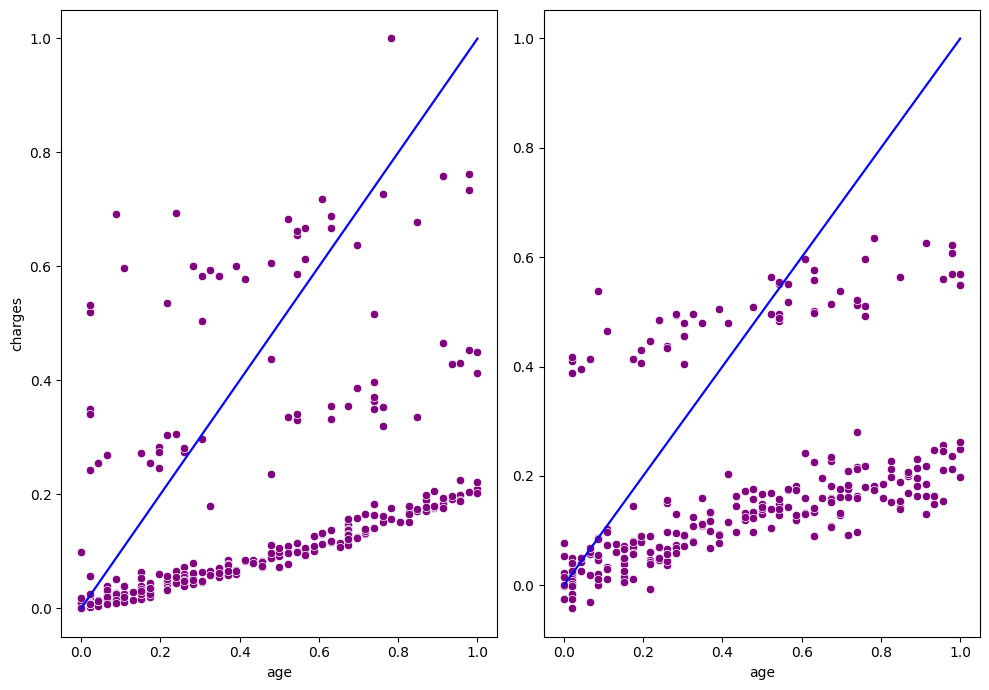

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Suponiendo que train_data, test_data y y_pred están definidos
fig, axis = plt.subplots(1, 2, figsize=(10, 7))  # Ajuste de tamaño de figura
total_data = pd.concat([train_data, test_data])

# Gráfico 1: puntos morados y línea rosa
sns.scatterplot(ax=axis[0], data=test_data, x="age", y="charges", color="purple")
sns.lineplot(ax=axis[0], x=test_data["age"], y=test_data["age"], color="blue")

# Gráfico 2: puntos morados y línea rosa
sns.scatterplot(ax=axis[1], x=test_data["age"], y=y_pred, color="purple")
sns.lineplot(ax=axis[1], x=test_data["age"], y=test_data["age"], color="blue").set(ylabel=None)

plt.tight_layout()
plt.show()


En estas dos gráficas podemos observar que:
- A medida que aumenta la edad, los cargos también tienden a aumentar.
- La línea de regresión sugiere la tendencia general de esta relación. Pero, hay una considerable dispersión de puntos alrededor de la línea, esto indica que la variabilidad de los datos no es explicada completamente por la edad.
- La dispersión de los puntos indica que hay otros factores además de la edad que afectan los cargos, y que el modelo de regresión podría no capturar toda la variabilidad en los datos.
En resumen esto quiere decir que si hay un aumento en la poliza de seguros a causa de la edad, pero también indica que hay otros factores que pueden hacer que este precio aumente.